### Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Although X Education gets a lot of leads, its lead conversion rate is very poor so CEO asks to concentrate on hot leads which will get converted to their Student

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data using Pandas
LS_df = pd.read_csv(r'C:\Users\subbu\Downloads\Lead Scoring Assignment\Leads.csv')
LS_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
LS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# checking the data frame
LS_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# finding columns and rows
LS_df.shape

(9240, 37)

In [6]:
# checking mean, max, min, std and count
LS_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Select value in all columns is replaced with NULL values as Select doesnt have any meaning
LS_df = LS_df.replace('Select',np.nan)

In [8]:
# Checking if there are columns with one unique value since it won't affect our analysis
LS_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns
LS_df1 = LS_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
# Checking the percentage of missing values
round(100*(LS_df.isnull().sum()/len(LS_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Dropping all the columns that are not required and having more than 70% missing/NULL values 
LS_df2 = LS_df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','How did you hear about X Education'],axis=1)
LS_df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,NaN,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [12]:
# Rechecking the percentage of missing values
round(100*(LS_df2.isnull().sum()/len(LS_df2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
LS_df2['Specialization'] = LS_df2['Specialization'].fillna('Not Available') 
LS_df2['What matters most to you in choosing a course'] = LS_df2['What matters most to you in choosing a course'].fillna('Not Available')
LS_df2['Country'] = LS_df2['Country'].fillna('Not Available')
LS_df2['Lead Quality'] = LS_df2['Lead Quality'].fillna('Not Available')
LS_df2['Tags'] = LS_df2['Tags'].fillna('Not Available')
LS_df2['City'] = LS_df2['City'].fillna('Not Available')
LS_df2['What is your current occupation'] = LS_df2['What is your current occupation'].fillna('Not Available')
LS_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
# Rechecking the percentage of missing values
round(100*(LS_df2.isnull().sum()/len(LS_df2.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [15]:
LS_df2["Country"].value_counts()

India                   6492
Not Available           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Sweden                     3
Uganda                     2
Asia/Pacific Region        2
China                      2
Ghana                      2
Italy                      2
Bangladesh                 2
Philippines                2
Netherlands                2
Belgium                    2
Indonesia                  1
Liberia                    1
Russia                     1
Malaysia                   1
Vietnam                    1
Switzerland   

In [16]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Available":
        category = "Not Available"
    else:
        category = "outside India"
    return category

LS_df2['Country'] = LS_df2.apply(lambda x:slots(x['Country']), axis = 1)
LS_df2['Country'].value_counts()

India            6492
Not Available    2461
outside India     287
Name: Country, dtype: int64

In [17]:
# Rechecking the percentage of missing values
round(100*(LS_df2.isnull().sum()/len(LS_df2.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [18]:
#LS_df2

In [19]:
LS_df2.dropna(inplace = True)

In [20]:
round(100*(LS_df2.isnull().sum()/len(LS_df2.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [21]:
# Removing Id values since they are unique for everyone
LS_df3 = LS_df2.drop('Prospect ID',1)
LS_df3.shape

(9074, 25)

In [22]:
LS_df4 = LS_df3.drop('Lead Number',1)
LS_df4.shape

(9074, 24)

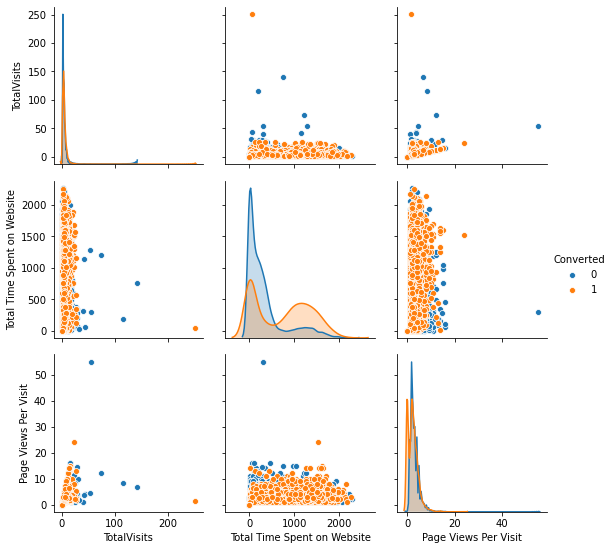

In [23]:
sns.pairplot(LS_df4, hue ='Converted') 
# to show the plot
plt.show() 

#### Based on above graphs , we can people who spent more on website, will convert to lead
#### People visited website more number of times will be converted

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

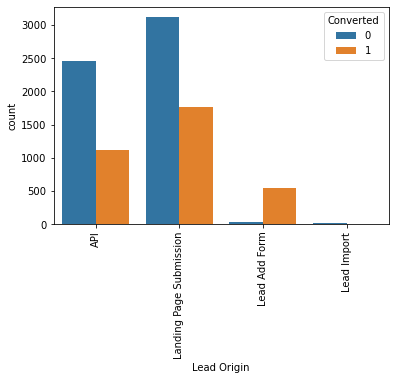

In [24]:

from matplotlib.pyplot import xticks
%matplotlib inline
sns.countplot(x = "Lead Origin", hue="Converted", data=LS_df4)
xticks(rotation = 90)


#### Landing page submission has more converted leads, also lead add form count is less but success is high

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

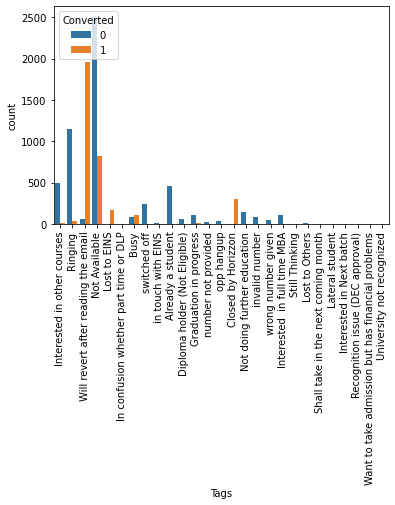

In [25]:
sns.countplot(x = "Tags", hue="Converted", data=LS_df4)
xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

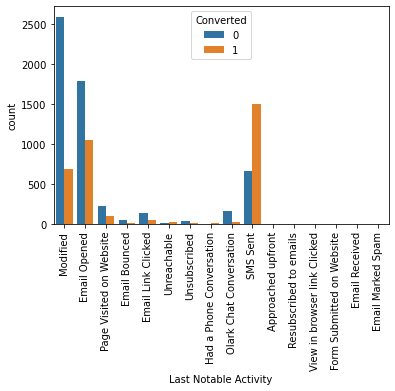

In [26]:

sns.countplot(x = "Last Notable Activity", hue="Converted", data=LS_df4)
xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

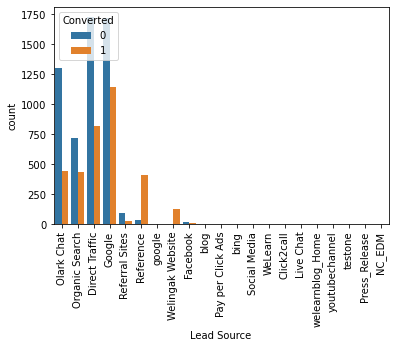

In [27]:

sns.countplot(x = "Lead Source", hue="Converted", data=LS_df4)
xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

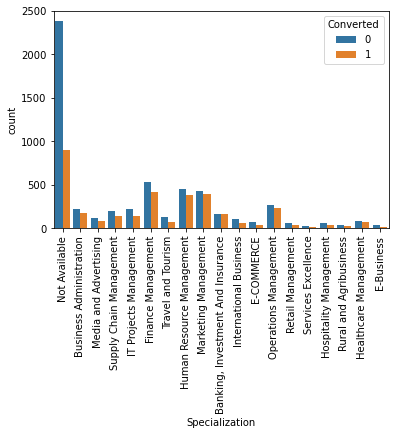

In [28]:
from matplotlib.pyplot import xticks
%matplotlib inline
sns.countplot(x = "Specialization", hue="Converted", data=LS_df4)
xticks(rotation = 90)

### Finance management, HR management and Marketing management people are mostly trying to upskill compared with other specialization.
#### Conversion rate is also high

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

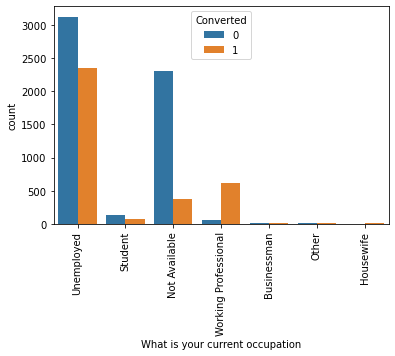

In [29]:

from matplotlib.pyplot import xticks
%matplotlib inline
sns.countplot(x = "What is your current occupation", hue="Converted", data=LS_df4)
xticks(rotation = 90)


#### Working professional conversion rate is high

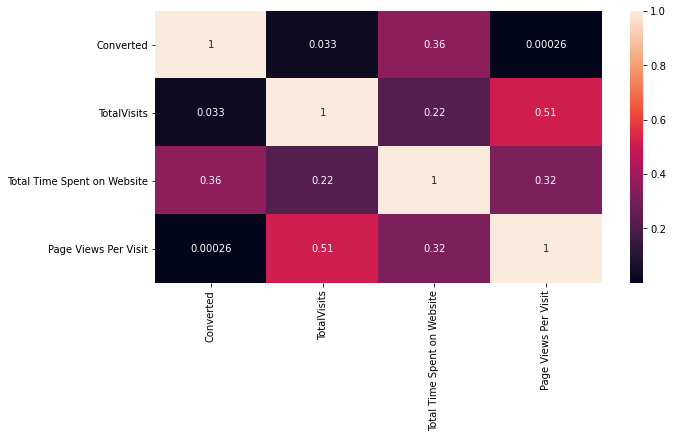

In [30]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(LS_df4.corr(), annot=True)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

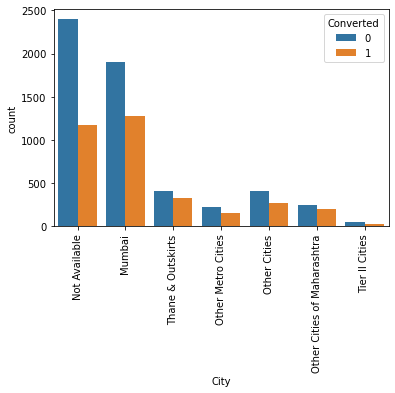

In [31]:
from matplotlib.pyplot import xticks
%matplotlib inline
sns.countplot(x = "City", hue="Converted", data=LS_df4)
xticks(rotation = 90)

#### Creating dummy variables to represent subgroups in the sample

In [32]:
LS_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [33]:
LS_df4.loc[:, LS_df4.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [34]:
dummy = pd.get_dummies(LS_df4[['Lead Origin','Specialization' ,'Tags','Lead Quality','Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dummy = pd.concat([LS_df4, dummy], axis=1)
df_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not Available,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside India,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df_dummy.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [36]:
df_dummy_final = df_dummy.drop(['What is your current occupation_Not Available','Tags','Lead Quality','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_Not Available','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_dummy_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,Not Available,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,Not Available,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,Mumbai,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,Mumbai,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,Mumbai,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,Mumbai,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,Mumbai,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,Mumbai,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,Other Metro Cities,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
df_dummy_final = df_dummy_final.drop(['City'], axis=1)

In [38]:
df_dummy_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
df_dummy_final.info

<bound method DataFrame.info of       Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00        

#### Test train Splitting

In [40]:
# Import the required library
from sklearn.model_selection import train_test_split
X = df_dummy_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# Putting the target variable in y
y = df_dummy_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [43]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


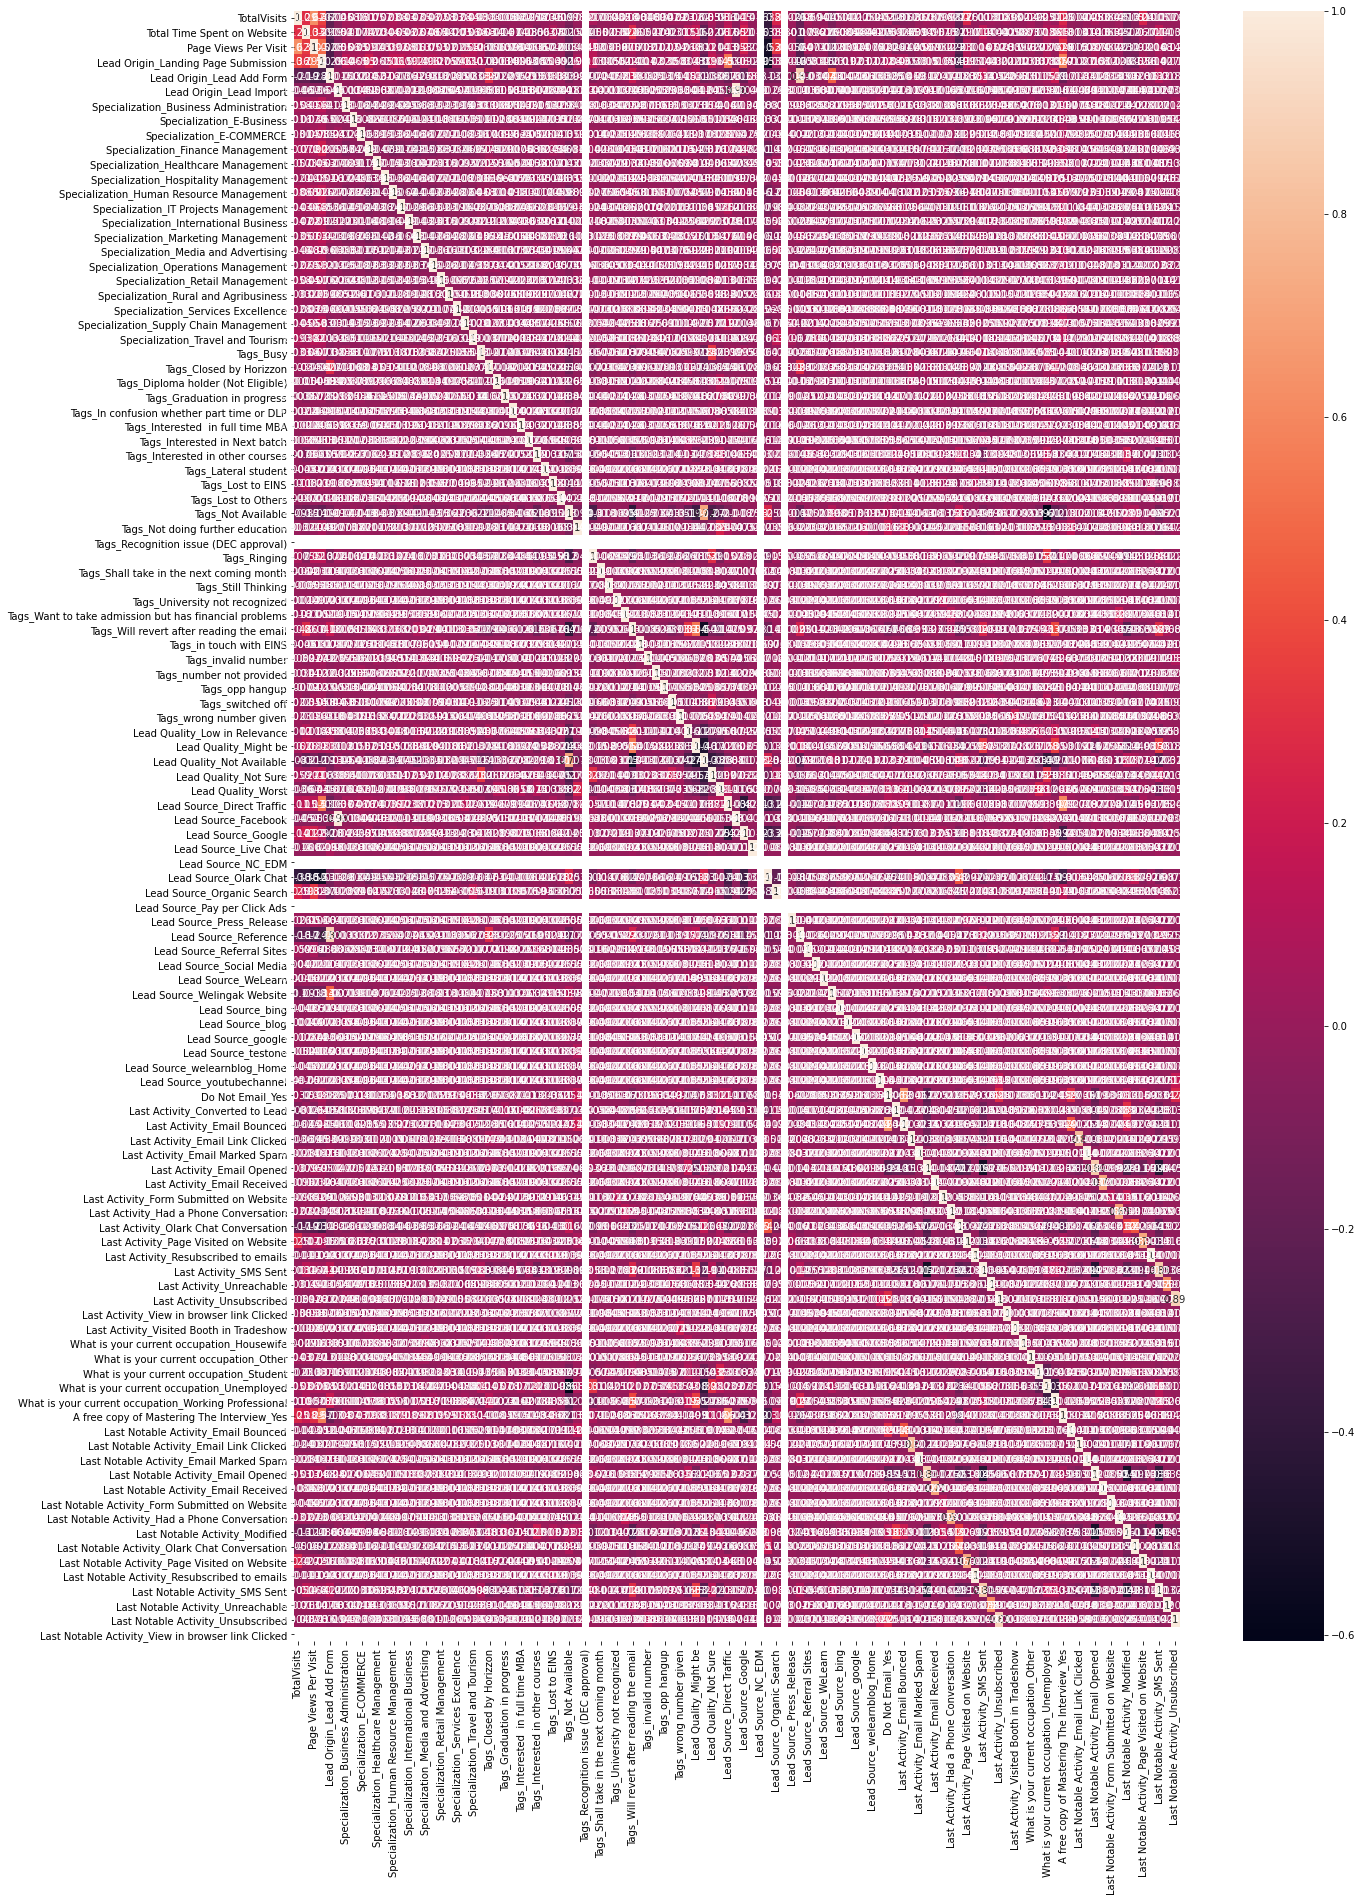

In [44]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

#### Model Building

In [45]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [46]:
from sklearn.feature_selection import RFE

In [47]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [48]:
#Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 42),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 44),
 ('Specialization_Business Administration', False, 63),
 ('Specialization_E-Business', False, 73),
 ('Specialization_E-COMMERCE', False, 83),
 ('Specialization_Finance Management', False, 56),
 ('Specialization_Healthcare Management', False, 77),
 ('Specialization_Hospitality Management', False, 24),
 ('Specialization_Human Resource Management', False, 71),
 ('Specialization_IT Projects Management', False, 64),
 ('Specialization_International Business', False, 78),
 ('Specialization_Marketing Management', False, 41),
 ('Specialization_Media and Advertising', False, 92),
 ('Specialization_Operations Management', False, 85),
 ('Specialization_Retail Management', False, 79),
 ('Specialization_Rural and Agribusiness', False, 55),
 ('Specialization_

In [49]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]


In [50]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [51]:
# Importing statsmodels
import statsmodels.api as sm

In [52]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1122.8
Date:                Mon, 08 Mar 2021   Deviance:                       2245.6
Time:                        17:30:56   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.5020      0.284    -22.877      0.000      -7.059      -5.945
Total Time Spent on Website                              3.6850      0.231     15.931      0.000       3.232       4.138
Tags_Busy                                                2.5427      0.300      8.482      0.000       1.955       3.130
Tags_Closed by Horizzon                                  9.0310      0.764     11.826      0.000       7.534      10.528
Tags_Lost to EINS                                        8.8221      0.603     14.633      0.000       7.640      10.004
Tags_Not Available                                       3.6409      0.242     15.057      0.000       3.167       4.115
Tags_Ringing                                            -1.5647      0.300     -5.213      0.000      -2.153      -0.976
Tags_Will revert after reading the email                 6.6678      0.286     23.353      0.000       6.108       7.227
Tags_switched off                                       -2.6122      0.756     -3.455      0.001      -4.094      -1.130
Lead Quality_Worst                                      -2.3658      0.771     -3.067      0.002      -3.878      -0.854
Lead Source_Welingak Website                             3.8437      1.021      3.764      0.000       1.842       5.845
Last Activity_SMS Sent                                   2.0915      0.124     16.826      0.000       1.848       2.335
What is your current occupation_Student                  2.1842      0.499      4.379      0.000       1.207       3.162
What is your current occupation_Unemployed               2.4429      0.149     16.397      0.000       2.151       2.735
What is your current occupation_Working Professional     3.0056      0.424      7.087      0.000       2.174       3.837
Last Notable Activity_Modified                          -1.4789      0.132    -11.226      0.000      -1.737      -1.221
========================================================================================================================
"""

In [53]:

# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Making VIF for all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,3.96
6,Tags_Will revert after reading the email,2.78
0,Total Time Spent on Website,1.99
5,Tags_Ringing,1.80
10,Last Activity_SMS Sent,1.68
13,What is your current occupation_Working Profes...,1.68
4,Tags_Not Available,1.56
14,Last Notable Activity_Modified,1.56
8,Lead Quality_Worst,1.42
2,Tags_Closed by Horizzon,1.23


In [55]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [56]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.3
Date:                Mon, 08 Mar 2021   Deviance:                       2540.6
Time:                        17:30:56   Pearson chi2:                 9.09e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9844      0.226    -17.657      0.000      -4.427      -3.542
Total Time Spent on Website                              3.5667      0.214     16.648      0.000       3.147       3.987
Tags_Busy                                                2.6030      0.300      8.683      0.000       2.015       3.191
Tags_Closed by Horizzon                                  8.9960      0.755     11.918      0.000       7.517      10.475
Tags_Lost to EINS                                        7.7058      0.590     13.068      0.000       6.550       8.862
Tags_Not Available                                       1.9536      0.217      8.999      0.000       1.528       2.379
Tags_Ringing                                            -1.5143      0.300     -5.054      0.000      -2.101      -0.927
Tags_Will revert after reading the email                 6.5864      0.282     23.328      0.000       6.033       7.140
Tags_switched off                                       -2.5631      0.755     -3.397      0.001      -4.042      -1.084
Lead Quality_Worst                                      -2.1586      0.693     -3.117      0.002      -3.516      -0.801
Lead Source_Welingak Website                             5.5168      1.017      5.426      0.000       3.524       7.510
Last Activity_SMS Sent                                   1.9977      0.113     17.661      0.000       1.776       2.219
What is your current occupation_Student                  0.3873      0.551      0.703      0.482      -0.693       1.468
What is your current occupation_Working Professional     1.0464      0.418      2.504      0.012       0.227       1.866
Last Notable Activity_Modified                          -1.7334      0.126    -13.704      0.000      -1.981      -1.486
========================================================================================================================
"""

In [57]:

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,1.99
0,Total Time Spent on Website,1.89
10,Last Activity_SMS Sent,1.65
4,Tags_Not Available,1.56
13,Last Notable Activity_Modified,1.47
12,What is your current occupation_Working Profes...,1.30
5,Tags_Ringing,1.18
8,Lead Quality_Worst,1.17
2,Tags_Closed by Horizzon,1.13
11,What is your current occupation_Student,1.09


In [58]:
X_train.drop('Tags_Will revert after reading the email', axis = 1, inplace = True)

In [59]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1891.0
Date:                Mon, 08 Mar 2021   Deviance:                       3782.0
Time:                        17:30:57   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3672      0.082     -4.462      0.000      -0.528      -0.206
Total Time Spent on Website                              3.4750      0.175     19.880      0.000       3.132       3.818
Tags_Busy                                               -0.9924      0.230     -4.317      0.000      -1.443      -0.542
Tags_Closed by Horizzon                                  5.6367      0.756      7.456      0.000       4.155       7.118
Tags_Lost to EINS                                        4.8085      0.671      7.163      0.000       3.493       6.124
Tags_Not Available                                      -1.6401      0.091    -18.122      0.000      -1.818      -1.463
Tags_Ringing                                            -5.1499      0.233    -22.146      0.000      -5.606      -4.694
Tags_switched off                                       -6.2103      0.730     -8.512      0.000      -7.640      -4.780
Lead Quality_Worst                                      -5.1268      0.507    -10.104      0.000      -6.121      -4.132
Lead Source_Welingak Website                             5.5283      1.016      5.440      0.000       3.536       7.520
Last Activity_SMS Sent                                   2.0504      0.095     21.697      0.000       1.865       2.236
What is your current occupation_Student                  0.6820      0.304      2.241      0.025       0.085       1.278
What is your current occupation_Working Professional     2.1334      0.229      9.323      0.000       1.685       2.582
Last Notable Activity_Modified                          -1.8574      0.096    -19.420      0.000      -2.045      -1.670
========================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.53
9,Last Activity_SMS Sent,1.45
12,Last Notable Activity_Modified,1.45
4,Tags_Not Available,1.42
7,Lead Quality_Worst,1.15
11,What is your current occupation_Working Profes...,1.14
5,Tags_Ringing,1.12
2,Tags_Closed by Horizzon,1.09
10,What is your current occupation_Student,1.08
3,Tags_Lost to EINS,1.06


#### Creating prediction

In [61]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.530387
3604    0.118434
5584    0.646803
7679    0.118434
7563    0.009818
7978    0.960561
7780    0.441354
7863    0.971280
838     0.646375
708     0.130238
dtype: float64

In [62]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5303873 , 0.11843417, 0.64680307, 0.11843417, 0.00981835,
       0.9605611 , 0.44135447, 0.97127954, 0.64637464, 0.13023788])

In [63]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.530387
1,0,0.118434
2,0,0.646803
3,0,0.118434
4,0,0.009818


In [64]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.530387,1
1,0,0.118434,0
2,0,0.646803,1
3,0,0.118434,0
4,0,0.009818,0


### Model evaluation

In [65]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [66]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3524,  371],
       [ 451, 2005]], dtype=int64)

In [67]:

# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8705715635333019

In [68]:
# Substitute value of true positive
TP = confusion[1,1]
# Substitute value of true negatives
TN = confusion[0,0]
# Substitute value of false positives
FP = confusion[0,1] 
# Substitute value of false negatives
FN = confusion[1,0]

In [69]:
# Calculate the sensitivity
TP/(TP+FN)

0.8163680781758957

In [70]:
# Calculating the specificity
TN/(TN+FP)

0.9047496790757381

### Optimise cut off - ROC curve

In [71]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

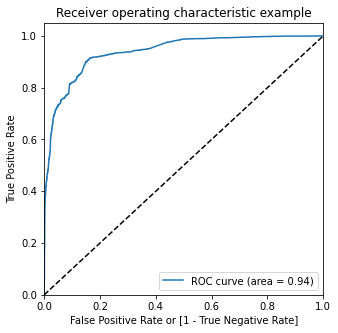

In [73]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [74]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.530387,1,1,1,1,1,1,1,0,0,0,0
1,0,0.118434,0,1,1,0,0,0,0,0,0,0,0
2,0,0.646803,1,1,1,1,1,1,1,1,0,0,0
3,0,0.118434,0,1,1,0,0,0,0,0,0,0,0
4,0,0.009818,0,1,0,0,0,0,0,0,0,0,0


In [75]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.709809,0.978827,0.540180
0.2,0.2,0.847111,0.921010,0.800513
0.3,0.3,0.867895,0.906759,0.843389
0.4,0.4,0.868682,0.888436,0.856226
0.5,0.5,0.870572,0.816368,0.904750
0.6,0.6,0.864903,0.734935,0.946855
0.7,0.7,0.861754,0.702769,0.962003
0.8,0.8,0.844119,0.640065,0.972786
0.9,0.9,0.780035,0.446254,0.990501


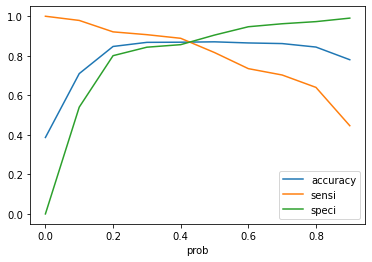

In [76]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [77]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.530387,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.118434,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.646803,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.118434,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.009818,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8663202645252717

In [79]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3436,  459],
       [ 390, 2066]], dtype=int64)

In [80]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [81]:
# Calculating the sensitivity
TP/(TP+FN)

0.8412052117263844

In [82]:
# Calculating the specificity
TN/(TN+FP)

0.8821566110397946

### Prediction on test set

In [83]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [84]:
# Substituting all the columns in the final train model
col = X_train.columns

In [85]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Available,Tags_Ringing,Tags_switched off,Lead Quality_Worst,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Modified
8308,1.0,0.416813,0,0,0,0,0,0,0,0,0,0,0,1
7212,1.0,0.001320,0,0,0,0,0,0,0,0,1,0,1,0
2085,1.0,0.000000,0,0,0,1,0,0,0,1,0,0,0,0
4048,1.0,0.617077,0,0,0,1,0,0,0,0,1,0,0,0
4790,1.0,0.005282,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1
8179,1.0,0.148768,0,0,0,1,0,0,0,0,1,0,0,1
6236,1.0,0.000000,0,0,0,1,0,0,0,0,0,0,0,0
5240,1.0,0.458627,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.315136
1,1,0.978567
2,1,0.971280
3,1,0.899109
4,0,0.413662


In [87]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.315136,0
1,1,0.978567,1
2,1,0.971280,1
3,1,0.899109,1
4,0,0.413662,0
...,...,...,...
2718,1,0.097560,0
2719,0,0.214595,0
2720,0,0.118434,0
2721,1,0.963627,1


In [88]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8597135512302607

In [89]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1512,  232],
       [ 150,  829]], dtype=int64)

In [90]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [91]:
# Calculating the sensitivity
TP/(TP+FN)

0.8467824310520939

In [92]:
# Calculating the specificity
TN/(TN+FP)

0.8669724770642202

### Precision Recall

In [93]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3524,  371],
       [ 451, 2005]], dtype=int64)

In [94]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8438552188552189

In [95]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8163680781758957

#### Precision recall Trade off

In [96]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

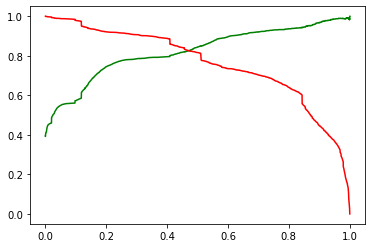

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.530387,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.118434,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.646803,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.118434,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.009818,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8694693749015903

In [101]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3314,  581],
       [ 248, 2208]], dtype=int64)

In [102]:

# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7916816063105055

In [104]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8990228013029316

### Prediction on Test set

In [105]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.315136
1,1,0.978567
2,1,0.971280
3,1,0.899109
4,0,0.413662


In [106]:
# Making prediction using cut off 0.40
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.315136,0
1,1,0.978567,1
2,1,0.971280,1
3,1,0.899109,1
4,0,0.413662,1
...,...,...,...
2718,1,0.097560,0
2719,0,0.214595,0
2720,0,0.118434,0
2721,1,0.963627,1


In [107]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8615497612926919

In [108]:

# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1465,  279],
       [  98,  881]], dtype=int64)

In [109]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [110]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7916816063105055

In [111]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8990228013029316

### Conclusion

#### Based on model built, overall accurary came out to be 92.10% and so this model is very good and variables considered are effective
#### Below points are derived
##### Person who spent more time on website will be converted to positive lead
#####  Based on VIF - These 3 variables are not highly correlated with remaining independent variables hence these variables are good
> Tags_switched off	1.16
>> Tags_Lost to EINS	1.10
>>> Lead Source_Welingak Website	1.10
#### Tags_Closed by Horizzon - has higher coefficent based on the model, hence we can target these people
#### We can concentrate on the People enquired from Mumbai, with specialization as Finance management and lead source as Google
